In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as sl
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Data/1906/train.csv")

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [4]:
data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.321888,NaN,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,NaN,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,NaN,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,NaN,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000


In [5]:
data.shape

(466, 11)

In [6]:
data['Dataset'].value_counts()

1    333
2    133
Name: Dataset, dtype: int64

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [8]:
data[data.Albumin_and_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
31,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
41,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
188,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1


In [9]:
data = data[data.Albumin_and_Globulin_Ratio.isnull() == False]

In [10]:
data.Gender.value_counts()

Male      359
Female    104
Name: Gender, dtype: int64

In [11]:
data['is_male'] = data.Gender.map({'Female' : 0, 'Male' : 1})

In [12]:
data[['is_male', 'Gender']].head()

,is_male,Gender
0,1,Male
1,0,Female
2,1,Male
3,1,Male
4,0,Female


In [13]:
data.query("Gender == 'Male'")['is_male'].value_counts()

1    359
Name: is_male, dtype: int64

In [14]:
data.query("Gender == 'Female'")['is_male'].value_counts()

0    104
Name: is_male, dtype: int64

In [15]:
data1= data.groupby('Dataset')

In [16]:
data1.get_group(1).describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,is_male
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.0,331.000000
mean,46.667674,4.319033,1.947432,325.438066,102.208459,144.851964,6.457402,3.054079,0.917885,1.0,0.788520
std,15.160899,7.513654,3.232067,279.774723,225.316038,366.434259,1.114654,0.800117,0.342427,0.0,0.408976
min,8.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0,0.000000
25%,34.000000,0.800000,0.200000,183.500000,25.000000,28.500000,5.700000,2.500000,0.700000,1.0,1.000000
50%,47.000000,1.400000,0.500000,230.000000,41.000000,53.000000,6.500000,3.000000,0.900000,1.0,1.000000
75%,58.000000,3.850000,1.900000,331.500000,77.500000,115.000000,7.200000,3.600000,1.100000,1.0,1.000000
max,78.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.0,1.000000


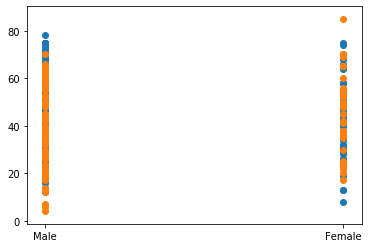

In [17]:
plt.pyplot.scatter(data1.get_group(1).Gender, data1.get_group(1).Age, label="1")
plt.pyplot.scatter(data1.get_group(2).Gender, data1.get_group(2).Age, label="2")

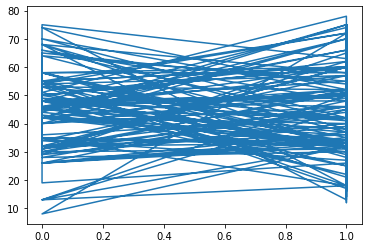

In [18]:
plt.pyplot.plot(data1.get_group(1).is_male, data1.get_group(1).Age, label='1')

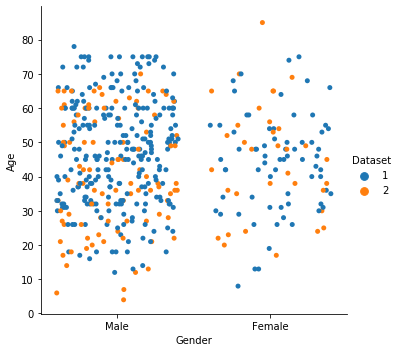

In [19]:
sns.catplot(data=data, x="Gender", y="Age", hue="Dataset",jitter=0.4)

In [20]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,is_male
Age,1.000000,0.016519,0.003891,0.110840,-0.067595,0.005517,-0.199145,-0.278243,-0.221264,-0.132859,0.030772
Total_Bilirubin,0.016519,1.000000,0.865944,0.152563,0.201516,0.227341,0.007998,-0.210753,-0.188128,-0.217805,0.107918
Direct_Bilirubin,0.003891,0.865944,1.000000,0.185906,0.235222,0.260217,0.025153,-0.212337,-0.173758,-0.244710,0.117985
Alkaline_Phosphotase,0.110840,0.152563,0.185906,1.000000,0.099927,0.150559,-0.020949,-0.162802,-0.239228,-0.186383,-0.045341
Alamine_Aminotransferase,-0.067595,0.201516,0.235222,0.099927,1.000000,0.784172,-0.032339,-0.009111,0.015321,-0.157366,0.090355
Aspartate_Aminotransferase,0.005517,0.227341,0.260217,0.150559,0.784172,1.000000,-0.015526,-0.074725,-0.059750,-0.148565,0.086189
Total_Protiens,-0.199145,0.007998,0.025153,-0.020949,-0.032339,-0.015526,1.000000,0.772154,0.215055,0.043182,-0.142876
Albumin,-0.278243,-0.210753,-0.212337,-0.162802,-0.009111,-0.074725,0.772154,1.000000,0.673159,0.177963,-0.139252
Albumin_and_Globulin_Ratio,-0.221264,-0.188128,-0.173758,-0.239228,0.015321,-0.059750,0.215055,0.673159,1.000000,0.172084,-0.015578
Dataset,-0.132859,-0.217805,-0.244710,-0.186383,-0.157366,-0.148565,0.043182,0.177963,0.172084,1.000000,-0.049865


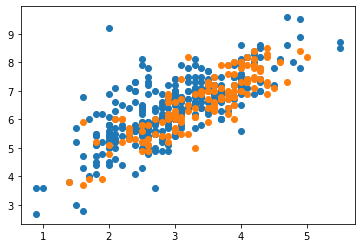

In [21]:
plt.pyplot.scatter(data1.get_group(1).Albumin, data1.get_group(1).Total_Protiens, label='1')
plt.pyplot.scatter(data1.get_group(2).Albumin, data1.get_group(2).Total_Protiens, label='2')

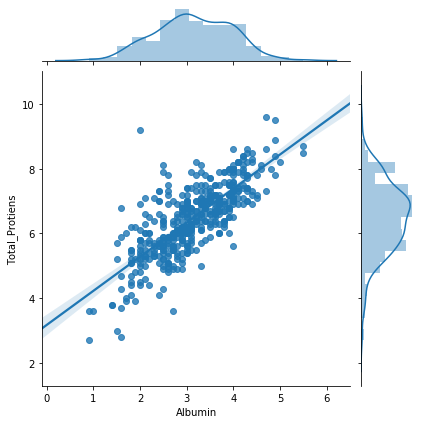

In [22]:
#sns.jointplot("Albumin", "Total_Protiens", hue="dataset", data=data, kind="kde")
sns.jointplot("Albumin", "Total_Protiens", data=data, kind="reg")
#sns.jointplot("Albumin", "Total_Protiens", data=data1, kind="hex")

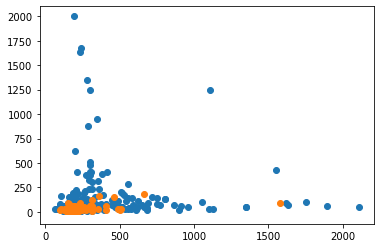

In [23]:
plt.pyplot.scatter(data1.get_group(1).Alkaline_Phosphotase, data1.get_group(1).Alamine_Aminotransferase, label='1')
plt.pyplot.scatter(data1.get_group(2).Alkaline_Phosphotase, data1.get_group(2).Alamine_Aminotransferase, label='2')

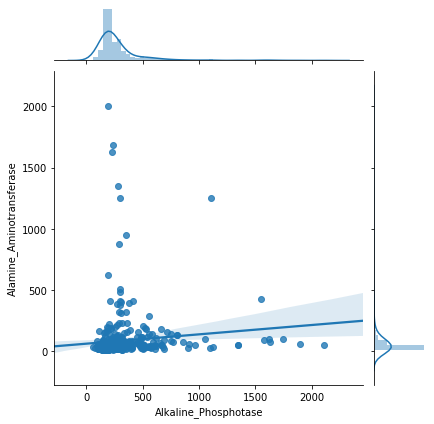

In [24]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=data, kind="reg")

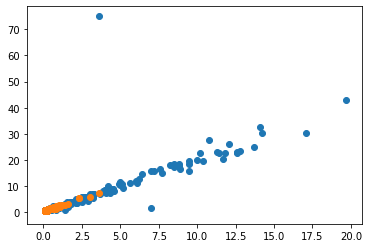

In [25]:
plt.pyplot.scatter(data1.get_group(1).Direct_Bilirubin, data1.get_group(1).Total_Bilirubin, label='1')
plt.pyplot.scatter(data1.get_group(2).Direct_Bilirubin, data1.get_group(2).Total_Bilirubin, label='2')

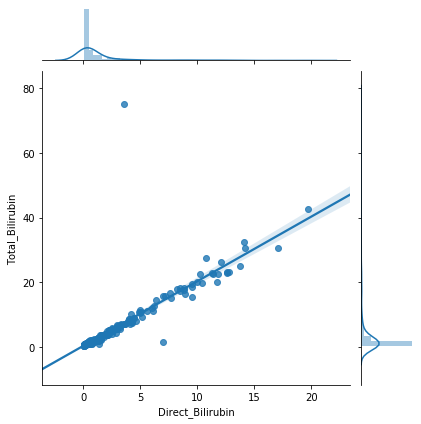

In [26]:
sns.jointplot("Direct_Bilirubin", "Total_Bilirubin", data=data, kind="reg")

In [27]:
data.Total_Bilirubin.value_counts().head()

0.8    69
0.7    60
0.9    49
0.6    32
1.0    27
Name: Total_Bilirubin, dtype: int64

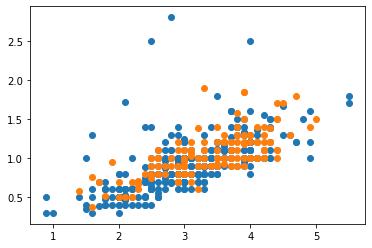

In [28]:
plt.pyplot.scatter(data1.get_group(1).Albumin, data1.get_group(1).Albumin_and_Globulin_Ratio, label='1')
plt.pyplot.scatter(data1.get_group(2).Albumin, data1.get_group(2).Albumin_and_Globulin_Ratio, label='2')

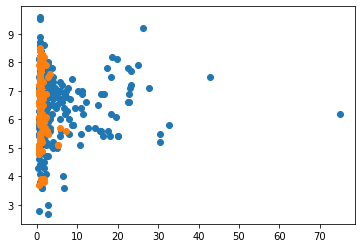

In [29]:
plt.pyplot.scatter(data1.get_group(1).Total_Bilirubin, data1.get_group(1).Total_Protiens, label='1')
plt.pyplot.scatter(data1.get_group(2).Total_Bilirubin, data1.get_group(2).Total_Protiens, label='2')

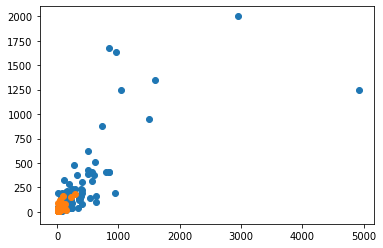

In [30]:
plt.pyplot.scatter(data1.get_group(1).Aspartate_Aminotransferase, data1.get_group(1).Alamine_Aminotransferase, label='1')
plt.pyplot.scatter(data1.get_group(2).Aspartate_Aminotransferase, data1.get_group(2).Alamine_Aminotransferase, label='2')

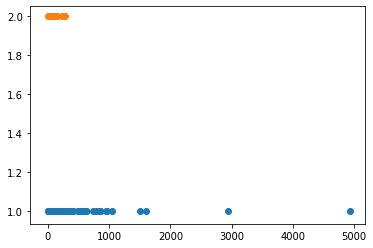

In [31]:
plt.pyplot.scatter(data1.get_group(1).Aspartate_Aminotransferase, data1.get_group(1).Dataset, label='1')
plt.pyplot.scatter(data1.get_group(2).Aspartate_Aminotransferase, data1.get_group(2).Dataset, label='2')

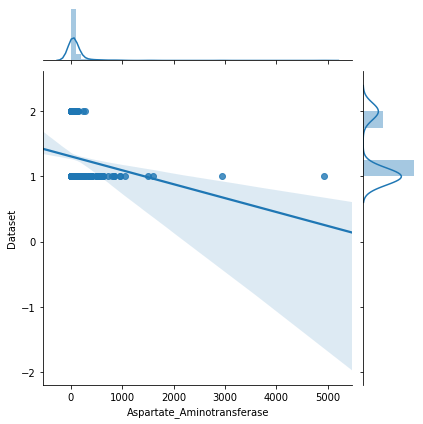

In [32]:
sns.jointplot("Aspartate_Aminotransferase", "Dataset", data=data, kind="reg")

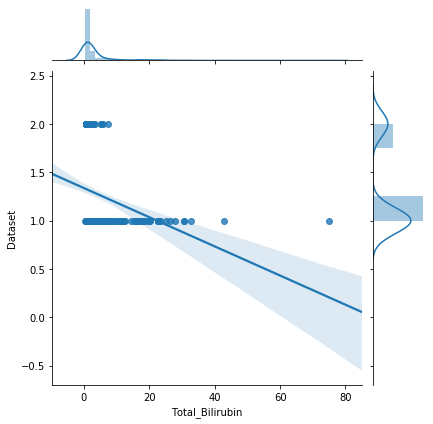

In [33]:
sns.jointplot("Total_Bilirubin", "Dataset", data=data, kind="reg")

In [34]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'is_male'],
      dtype='object')

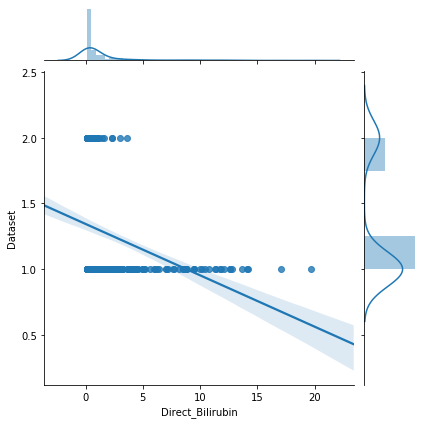

In [35]:
sns.jointplot("Direct_Bilirubin", "Dataset", data=data, kind="reg")

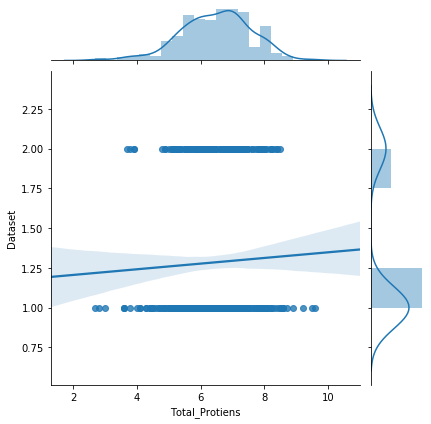

In [36]:
sns.jointplot("Total_Protiens", "Dataset", data=data, kind="reg")

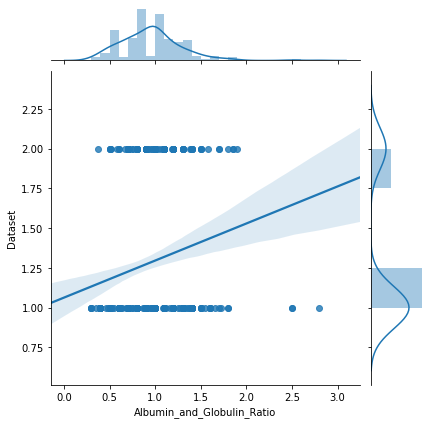

In [37]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Dataset", data=data, kind="reg")

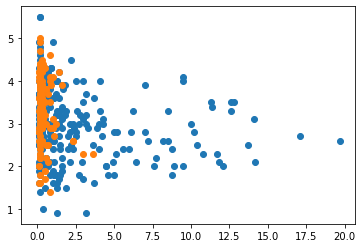

In [38]:
plt.pyplot.scatter(data1.get_group(1).Direct_Bilirubin, data1.get_group(1).Albumin, label='1')
plt.pyplot.scatter(data1.get_group(2).Direct_Bilirubin, data1.get_group(2).Albumin, label='2')

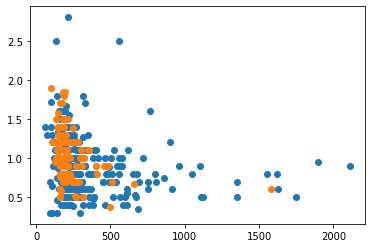

In [39]:
plt.pyplot.scatter(data1.get_group(1).Alkaline_Phosphotase, data1.get_group(1).Albumin_and_Globulin_Ratio, label='1')
plt.pyplot.scatter(data1.get_group(2).Alkaline_Phosphotase, data1.get_group(2).Albumin_and_Globulin_Ratio, label='2')

In [40]:
#training model

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [42]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,is_male
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0


In [43]:
X = data.copy(deep=True)

In [44]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,is_male
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0


In [45]:
del X['Gender']
del X['Dataset']

In [46]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,is_male
0,60,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0.8,0.2,158,21,16,6.0,3.0,1.00,0
2,60,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0


In [47]:
Y = data['Dataset'].copy(deep=True)

In [48]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [49]:
#X['DB2TB'] = X['Direct_Bilirubin'] * X['Total_Bilirubin']

In [50]:
#X['AA2AA'] = (X['Alamine_Aminotransferase']*100)/X['Aspartate_Aminotransferase']

In [51]:
#del X['Direct_Bilirubin']

In [52]:
#X['Globulin'] = X['Albumin']/X['Albumin_and_Globulin_Ratio']

In [53]:
#divide data large to prevent overfit

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=0)

In [55]:
X_train.shape

(277, 10)

In [56]:
X_test.shape

(186, 10)

In [57]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
model.feature_importances_

array([0.14448126, 0.09928112, 0.10146405, 0.13112317, 0.12340724,
       0.15002763, 0.11597321, 0.06754553, 0.05550441, 0.01119238])

In [59]:
model.n_estimators

10

In [60]:
model.max_features

'auto'

In [61]:
model.max_depth

In [62]:
model.min_samples_leaf

1

In [63]:
y_pred = model.predict(X_test)

In [64]:
sl.metrics.accuracy_score(y_test, y_pred)

0.6720430107526881

In [65]:
y_pred1 = model.predict(X_train)

In [66]:
sl.metrics.accuracy_score(y_train, y_pred1)

0.9747292418772563

In [67]:
y_pred2 = model.predict(X)

In [68]:
sl.metrics.accuracy_score(Y, y_pred2)

0.8531317494600432

In [69]:
sl.metrics

<module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>

In [70]:
test_data = pd.read_csv("Data/1906/test.csv")

In [71]:
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [72]:
test_data['is_male'] = test_data.Gender.map({'Female' : 0, 'Male' : 1})

In [73]:
del test_data['Gender']

In [74]:
test_data.fillna(0, inplace=True)

In [75]:
y_test_pred = model.predict(test_data)

In [76]:
X_train.to_csv("X.csv")

In [77]:
y_train.to_csv("y.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [78]:
test_data.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'is_male'],
      dtype='object')

In [79]:
X_train.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'is_male'],
      dtype='object')

In [80]:
test_data_for_write = pd.read_csv("Data/1906/test.csv")

In [81]:
test_data_for_write['Dataset'] = y_test_pred

In [82]:
test_data_for_write.to_csv("ML Ass, Prob-1.csv")